# Cross-Cohort Music Recommendation - Clustering

Now that you've completed EDA, utilize your insights to select the correct model and subsequently apply machine learning on your dataset.



## Questions
Is this a supervised or unsupervised task? Furthermore are we performing classification or regression?  

Answer here

Are you predicting for multiple classes or binary classes?  

Answer here

Given these observations, which machine learning model will you choose?  

Answer here

### 1) Set up your predictors

Use your cleaned and transformed dataset to divide your features and labels into training and testing sets. Make sure you’re only using numeric or properly encoded features.  

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# TODO: import your selected model and its evaluation metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# TODO: load in dataset
songs = pd.read_csv("../data/music_pca_data.csv")

# TODO: select your predictor columns

X = songs.drop(columns=["song", "genre"])
y = songs["song"]

### 2) Search for best clusters

Use tools the elbow method or silhouette score to find the best clusters for your model.

In [3]:
inertias = []
ks = range(1, 10)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=3795).fit(X)
    inertias.append(kmeans.inertia_)
    print('K:', k, 'Inertia:', kmeans.inertia_)

K: 1 Inertia: 29.588494334404626
K: 2 Inertia: 22.7782564242898
K: 3 Inertia: 14.72588065317106
K: 4 Inertia: 8.359780356269285
K: 5 Inertia: 2.31474924421113
K: 6 Inertia: 0.7248159679240394
K: 7 Inertia: 0.47409637022126216
K: 8 Inertia: 0.339947055750671
K: 9 Inertia: 0.3031269628257607


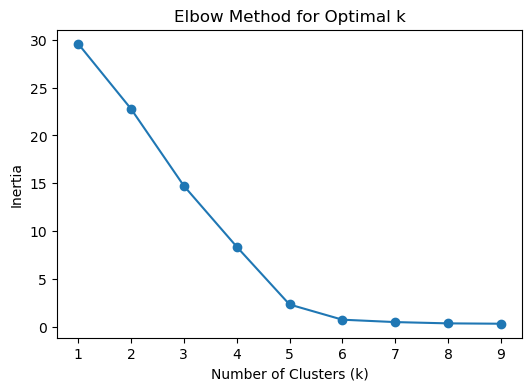

In [4]:
plt.figure(figsize=(6, 4))
plt.plot(list(ks), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

## Observations:
- A k of 5 seems to be the appropriate value based on the elbow method

### 3) Train your model

Select the model with best cluster number and generate predictions on your test set. Evaluate how "well" your model clustered songs by evaluating the songs that exist in the same cluster assignments. 

In [5]:
kmeans_music = KMeans(n_clusters=5, random_state=3795)
kmeans_music.fit(X)

KMeans(n_clusters=5, random_state=3795)

In [6]:
# predict your labels on your predictors and assign it to a new column
labels = kmeans_music.predict(X)
songs["labels"] = labels

# view your cluster assignments
labeled_music = songs[["song", "genre", "labels"]]
labeled_music.head()

,song,genre,labels
0,A Fan's Mail,funk,0
1,Abracadabra,pop,3
2,Aguas De Marco,bossa nova,0
3,Another Time,hip hop,4
4,Belong to the World,hip hop,4


In [14]:
# view the songs that fall into specific clusters, what sort of insight do you think was captured here?
labeled_music[labeled_music["labels"] == 0]

,song,genre,labels
0,A Fan's Mail,funk,0
2,Aguas De Marco,bossa nova,0
6,Blue Bayou,country rock,0
7,Calabria 2008,electronic,0
8,Dancer,rock,0
11,Do 4 Love,R&B,0
14,For my Hand,afrobeats,0
15,Frederick,rock,0
17,Freefall,house,0
18,Gypsy Woman,electronic,0


Serialize your model and run it in your dashboard via `streamlit run recommender.py`

In [15]:
labeled_music[labeled_music["labels"] == 1]

,song,genre,labels
29,Like a Tattoo,soul,1
32,Make Yours a Happy Home,soul,1
40,Promises,soul,1
48,Summer Nights,soul,1
49,Tadow,soul,1
52,The First Time Ever I Saw Your Face,soul,1
58,What You Won't Do for Love,soul,1


In [16]:
labeled_music[labeled_music["labels"] == 2]

,song,genre,labels
10,Diana in The Autumn Wind,jazz,2
12,Early Summer,jazz,2
21,Huit Octobre 1971,jazz,2
27,Kalidoscope,jazz,2
30,Love theme from spartacus,jazz,2
31,Love theme from the robe,jazz,2
33,Misty,jazz,2
34,My Favorite Things,jazz,2
47,Summer in the City,jazz,2


In [17]:
labeled_music[labeled_music["labels"] == 3]

,song,genre,labels
1,Abracadabra,pop,3
9,Diamonds,pop,3
13,Electric Feel,pop,3
36,Only in my Dreams,pop,3
43,Say it Right,pop,3
46,Sky Restaurant,pop,3
54,The Word 2,pop,3


In [18]:
labeled_music[labeled_music["labels"] == 4]

,song,genre,labels
3,Another Time,hip hop,4
4,Belong to the World,hip hop,4
5,Benzoin Gum,hip hop,4
16,Freedom Time,hip hop,4
37,Passin Me By,hip hop,4
44,Shiki No Uta,hip hop,4
57,Wake Up,hip hop,4


In [8]:
# serialize your model
import joblib

joblib.dump(kmeans_music, "../kmeans_model.pkl")

['../kmeans_model.pkl']

## Observations:
- Soul, jazz, pop and hip-hop are all cleanly separated after using kmeans clustering, however this appears to be due to an error in processing
- Will need to experiment to see what is wrong